In [1]:
import pandas as pd
import matplotlib

In [2]:
df1 = pd.read_csv('Real Estate Data V21.csv')
df1.head(5)

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [3]:
df2 = df1.copy()
df2.shape

(14528, 9)

In [4]:
def find_bhk(input_desc):
    input_desc = str(input_desc)
    tokenised_list = list(input_desc.split(' '))
    for i in range(1,len(tokenised_list)):
        if tokenised_list[i].upper() == 'BHK':
            try:
                return(int(tokenised_list[i-1]))
            except:
                return(-1)
    return(-1)

In [5]:
a = df2.Description[1]
print(a)
print(find_bhk(a))

Looking for a 10 BHK Independent House for sale in Chennai? Your search ends here. Buy this 10 BHK property in Chennai's finest location, Pozhichalur. This is an owner listed property and there is no brokerage involved. This Independent House is available at a reasonable price of Rs 2.25 Cr. Maintenance charges in this property is Rs 2000. The built up area of this property is 7000 Square feet. It is spacious for a family and this property has a carpet area of 500 Square feet. There are 10 bedrooms and 9 bathroom. There are a number of reputed schools in the vicinity such as Peace On Green Ear...
10


In [6]:
df2['BHK'] = df2['Property Title'].apply(lambda x: find_bhk(x))
df2.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2


In [7]:
df2.BHK.unique()

array([ 4, 10,  3,  7,  2,  1,  6,  5, -1,  8,  9], dtype=int64)

In [8]:
df2.shape

(14528, 10)

In [9]:
df2[df2.BHK==-1].count()

Name              907
Property Title    907
Price             907
Location          907
Total_Area        907
Price_per_SQFT    907
Description       907
Baths             907
Balcony           907
BHK               907
dtype: int64

In [10]:
df3 = df2[df2.BHK!=-1]
df3.shape

(13621, 10)

In [11]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [12]:
df4 = df3[df3['BHK'].apply(is_int)]
df4.shape

(13621, 10)

In [13]:
df4.BHK.unique()

array([ 4, 10,  3,  7,  2,  1,  6,  5,  8,  9], dtype=int64)

In [14]:
df4.groupby('Location')['Location'].agg('count')

Location
    Madhurangan Apartment ,Ambegaon, Pune                                  1
   Manganahalli    Sriram Layout ,Ullal Uppanagar, Bangalore               1
  Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune    1
 A N SWAGATH,Gubbalala, Subramanyapura,Bangalore                           1
 A wing Sang,Ghartan Pada, Dahisar East,Mumbai                             1
                                                                          ..
west hills,Suriyammapet, Saidapet,Chennai                                  1
wind apartment ,New Ballygunge, Kasba,Kolkata                              1
yadari,Devasthanagalu, Varthur,Bangalore                                   1
yamuna sadan,Vishwakarma Colony, Pul Prahlad Pur,New Delhi                 1
yesh homes,Nemilichery, Chromepet,Chennai                                  1
Name: Location, Length: 6689, dtype: int64

In [15]:
df5 = df4.drop(['Name','Property Title','Description','Balcony'],axis='columns')
df5.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2


In [16]:
df5.isnull().sum()

Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Baths             0
BHK               0
dtype: int64

In [17]:
def find_price(x):
    try:
        return(x.split(' ')[1].upper())
    except:
        return(x[-1].upper())

In [18]:
df5['Price_Value'] = df5['Price'].apply(find_price)

In [19]:
df5.Price_Value.unique()

array(['CR', 'L', '0', 'LACS', 'K'], dtype=object)

In [20]:
df6 = df5[df5.Price_Value != '0']

In [21]:
df6.Price_Value.unique()

array(['CR', 'L', 'LACS', 'K'], dtype=object)

In [22]:
df6.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L


In [23]:
def find_price_amount(x):
    try:
        y = x.split(' ')[0]
        return(y[1:])
    except:
        return(-1)

In [24]:
df6['Price_amount'] = df6['Price'].apply(find_price_amount)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9676\937955666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Price_amount'] = df6['Price'].apply(find_price_amount)


In [25]:
df6.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0


In [26]:
def price_multiplier(x):
    if x == 'CR':
        return(1)
    elif x == 'L' or x == 'LACS':
        return(100)
    elif x == 'K':
        return(10000)
    else:
        return(-1)

In [27]:
df6['PriceMultiplier'] = df6['Price_Value'].apply(price_multiplier)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9676\1118023132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PriceMultiplier'] = df6['Price_Value'].apply(price_multiplier)


In [28]:
df6.PriceMultiplier.unique()

array([    1,   100, 10000], dtype=int64)

In [29]:
df7 = df6[df6.Price_Value != 'K']
df7.PriceMultiplier.unique()

array([  1, 100], dtype=int64)

In [30]:
df7.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,1
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,1
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,1
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,1
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100


In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df7[~df7['Price_amount'].apply(is_float)]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier


In [33]:
df8 = df7.copy()

In [34]:
df8.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,1
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,1
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,1
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,1
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100


In [35]:
df8['Location'].unique()

array(['Kanathur Reddikuppam, Chennai',
       'Ramanathan Nagar, Pozhichalur,Chennai',
       'Kasthuribai Nagar, West Tambaram,Chennai', ...,
       'Bulder floor,Jaitpur, New Delhi',
       'Krishna Park Extension, Tilak Nagar,New Delhi',
       'Lig flat rohini,Sector 16E, Sector 16 Rohini,New Delhi'],
      dtype=object)

In [36]:
df8['city'] = df8['Location'].apply(lambda x: x.split(',')[-1])
df8.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,1,Chennai
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,1,Chennai
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,1,Chennai
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,1,Chennai
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100,Chennai


In [37]:
df8['city'] = df8['city'].str.strip()
df8['city'].unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'New Delhi'], dtype=object)

In [38]:
df8['Total_Area'].unique()

array([2583, 7000, 1320, ...,  783,  171,  472], dtype=int64)

In [39]:
print(df8['Price_per_SQFT'].unique())
print(df8['Baths'].unique())

[ 7700.  3210.  7580. ... 12110. 16860. 20470.]
[4 6 3 5 2 1]


In [40]:
location_stats = df8.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats_lessthan10 = location_stats[location_stats<10]
df8.Location = df8.Location.apply(lambda x: 'Others' if x in location_stats_lessthan10 else x)

In [41]:
df9 = df8.copy()

In [42]:
len(df9['Location'].unique())

181

In [43]:
df9.tail()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
14522,₹55.0 L,Others,405,13580.0,2,7,L,55.0,100,New Delhi
14523,₹40.0 L,Others,1053,3800.0,3,2,L,40.0,100,New Delhi
14524,₹14.0 L,Others,472,2970.0,2,1,L,14.0,100,New Delhi
14525,₹30.0 L,Others,378,7940.0,1,1,L,30.0,100,New Delhi
14526,₹60.0 L,Others,700,8570.0,2,3,L,60.0,100,New Delhi


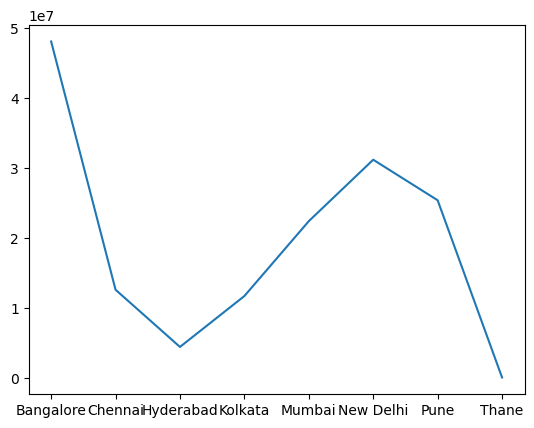

In [44]:
import matplotlib.pyplot as plt
x = []
y = []
z = []
for key,value in df9.groupby('city'):
    x.append(value.city.max())
    y.append(value.Price_per_SQFT.sum())
    
z = list(zip(x,y))

plt.plot(x[:],y[:]) 



In [45]:
df9.Price_per_SQFT.describe()

count     13617.000000
mean      11429.591687
std       47551.805888
min        1000.000000
25%        4500.000000
50%        6040.000000
75%        9170.000000
max      999000.000000
Name: Price_per_SQFT, dtype: float64

In [46]:
df9.loc[df9['Price_per_SQFT'] == 0]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city


In [47]:
df9.Price_per_SQFT.unique()

array([ 7700.,  3210.,  7580., ..., 12110., 16860., 20470.])

In [48]:
df9[df9.Price_per_SQFT<0]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city


In [49]:
df9.BHK.unique()

array([ 4, 10,  3,  7,  2,  1,  6,  5,  8,  9], dtype=int64)

In [50]:
df9[df9.BHK == 10]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
1,₹2.25 Cr,Others,7000,3210.0,6,10,CR,2.25,1,Chennai
101,₹6.5 Cr,Others,8000,8130.0,1,10,CR,6.5,1,Chennai
777,₹5.9 Cr,Others,3750,15730.0,6,10,CR,5.9,1,Chennai
980,₹1.55 Cr,Others,3212,4830.0,1,10,CR,1.55,1,Chennai
1051,₹1.7 Cr,Others,1400,12140.0,3,10,CR,1.7,1,Chennai
...,...,...,...,...,...,...,...,...,...,...
14165,₹4.5 Cr,Others,3300,13640.0,2,10,CR,4.5,1,New Delhi
14355,₹2.5 Cr,Others,1170,21370.0,3,10,CR,2.5,1,New Delhi
14382,₹1.18 Cr,Others,3250,3630.0,3,10,CR,1.18,1,New Delhi
14421,₹6.0 Cr,Others,1480,40540.0,3,10,CR,6.0,1,New Delhi


In [51]:
df9['Area_per_BHK'] = df9.Total_Area / df9.BHK

In [52]:
df9.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
0,₹1.99 Cr,Others,2583,7700.0,4,4,CR,1.99,1,Chennai,645.750000
1,₹2.25 Cr,Others,7000,3210.0,6,10,CR,2.25,1,Chennai,700.000000
2,₹1.0 Cr,Others,1320,7580.0,3,3,CR,1.0,1,Chennai,440.000000
3,₹3.33 Cr,Others,4250,7840.0,5,7,CR,3.33,1,Chennai,607.142857
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100,Chennai,480.000000


In [53]:
df9.Area_per_BHK.describe()

count    13617.000000
mean       523.413664
std        354.512317
min         15.000000
25%        400.000000
50%        491.666667
75%        597.600000
max      15000.000000
Name: Area_per_BHK, dtype: float64

In [54]:
df9[df9.Area_per_BHK < 300].count()

Price              1272
Location           1272
Total_Area         1272
Price_per_SQFT     1272
Baths              1272
BHK                1272
Price_Value        1272
Price_amount       1272
PriceMultiplier    1272
city               1272
Area_per_BHK       1272
dtype: int64

In [55]:
df10 = df9[df9.Area_per_BHK > 300]

In [56]:
df10.count()

Price              12100
Location           12100
Total_Area         12100
Price_per_SQFT     12100
Baths              12100
BHK                12100
Price_Value        12100
Price_amount       12100
PriceMultiplier    12100
city               12100
Area_per_BHK       12100
dtype: int64

In [57]:
df10.Area_per_BHK.describe()

count    12100.000000
mean       561.500226
std        357.490664
min        300.500000
25%        425.000000
50%        500.000000
75%        600.000000
max      15000.000000
Name: Area_per_BHK, dtype: float64

In [58]:
df10[df10.BHK == 10]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
1,₹2.25 Cr,Others,7000,3210.0,6,10,CR,2.25,1,Chennai,700.0
101,₹6.5 Cr,Others,8000,8130.0,1,10,CR,6.5,1,Chennai,800.0
777,₹5.9 Cr,Others,3750,15730.0,6,10,CR,5.9,1,Chennai,375.0
980,₹1.55 Cr,Others,3212,4830.0,1,10,CR,1.55,1,Chennai,321.2
1222,₹8.0 Cr,Others,6675,11980.0,1,10,CR,8.0,1,Chennai,667.5
...,...,...,...,...,...,...,...,...,...,...,...
13718,₹75.0 L,Others,3225,2330.0,5,10,L,75.0,100,New Delhi,322.5
13806,₹6.0 Cr,Others,4000,15000.0,4,10,CR,6.0,1,New Delhi,400.0
13852,₹6.5 Cr,Others,5000,13000.0,5,10,CR,6.5,1,New Delhi,500.0
14165,₹4.5 Cr,Others,3300,13640.0,2,10,CR,4.5,1,New Delhi,330.0


In [59]:
df10[df10.Baths >= (df10.BHK+2)].count()

Price              490
Location           490
Total_Area         490
Price_per_SQFT     490
Baths              490
BHK                490
Price_Value        490
Price_amount       490
PriceMultiplier    490
city               490
Area_per_BHK       490
dtype: int64

In [60]:
df11 = df10[df10.Baths < (df10.BHK+2)]

In [61]:
df11.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
0,₹1.99 Cr,Others,2583,7700.0,4,4,CR,1.99,1,Chennai,645.750000
1,₹2.25 Cr,Others,7000,3210.0,6,10,CR,2.25,1,Chennai,700.000000
2,₹1.0 Cr,Others,1320,7580.0,3,3,CR,1.0,1,Chennai,440.000000
3,₹3.33 Cr,Others,4250,7840.0,5,7,CR,3.33,1,Chennai,607.142857
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100,Chennai,480.000000


In [62]:
df11.Price_per_SQFT.describe()

count     11610.000000
mean      10141.858742
std       40958.570241
min        1000.000000
25%        4440.000000
50%        5870.000000
75%        8540.000000
max      999000.000000
Name: Price_per_SQFT, dtype: float64

In [63]:
df11[df11.Price_per_SQFT <= 1000]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
9088,₹30.0 L,Others,3000,1000.0,4,4,L,30.0,100,Kolkata,750.0
9163,₹30.0 L,Others,3000,1000.0,4,4,L,30.0,100,Kolkata,750.0


In [64]:
def remove_ppf_outlier(df):
    df_out = pd.DataFrame()
    for key, subf in df.groupby('Location'):
        m = np.mean(subf.Price_per_SQFT)
        sd = np.std(subf.Price_per_SQFT)
        reduced_df = subf[(subf.Price_per_SQFT>(m-sd)) & (subf.Price_per_SQFT<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [65]:
import numpy as np
df12 = remove_ppf_outlier(df11)

In [66]:
df12.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
0,₹1.91 Cr,"7th Phase, JP Nagar,Bangalore",1820,10500.0,3,3,CR,1.91,1,Bangalore,606.666667
1,₹1.75 Cr,"7th Phase, JP Nagar,Bangalore",1800,9720.0,3,3,CR,1.75,1,Bangalore,600.000000
2,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,543.333333
3,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,543.333333
4,₹78.0 L,"7th Phase, JP Nagar,Bangalore",1050,7430.0,3,2,L,78.0,100,Bangalore,525.000000


In [67]:
df12.count()

Price              10919
Location           10919
Total_Area         10919
Price_per_SQFT     10919
Baths              10919
BHK                10919
Price_Value        10919
Price_amount       10919
PriceMultiplier    10919
city               10919
Area_per_BHK       10919
dtype: int64

In [68]:
df11.count()

Price              11610
Location           11610
Total_Area         11610
Price_per_SQFT     11610
Baths              11610
BHK                11610
Price_Value        11610
Price_amount       11610
PriceMultiplier    11610
city               11610
Area_per_BHK       11610
dtype: int64

In [69]:
df12.Price_per_SQFT.describe()

count    10919.000000
mean      7639.388222
std       5760.147705
min       1000.000000
25%       4480.000000
50%       5850.000000
75%       8410.000000
max      52080.000000
Name: Price_per_SQFT, dtype: float64

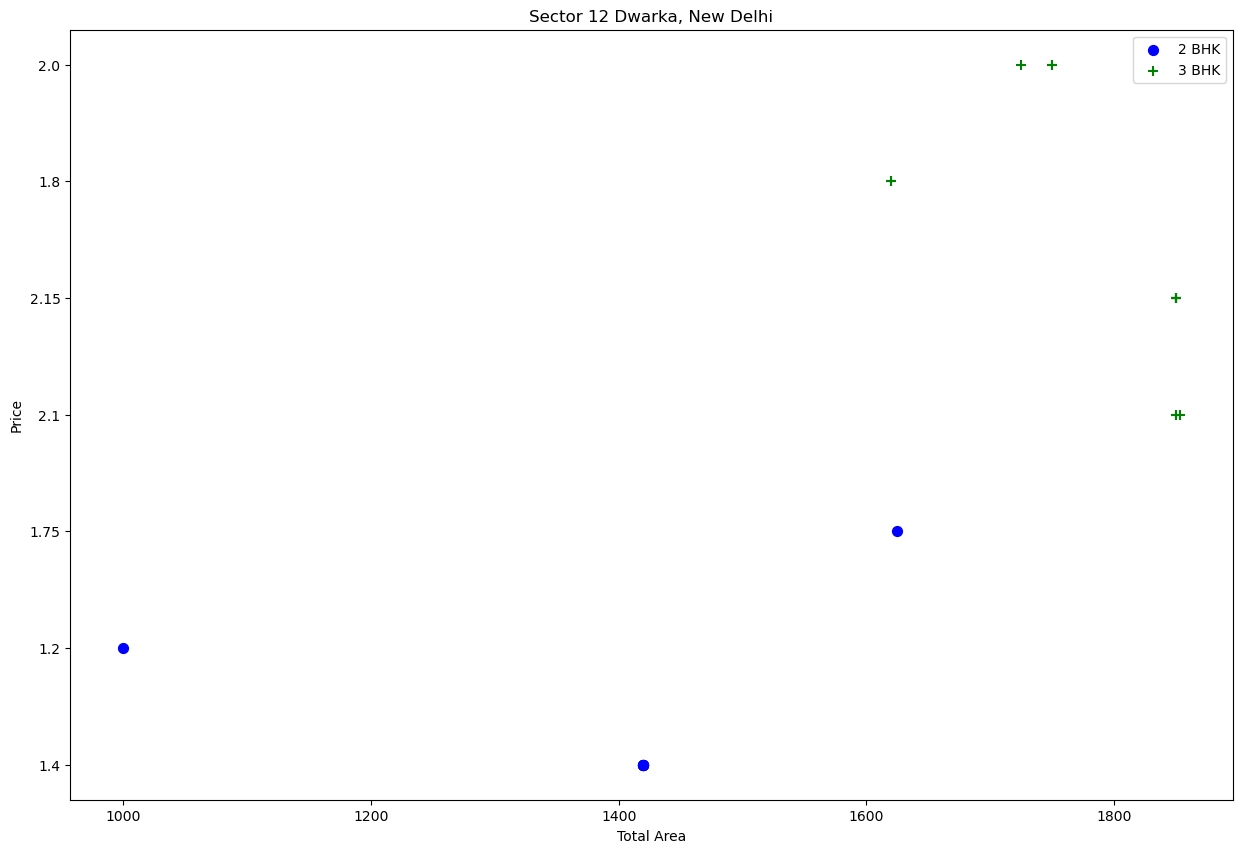

In [70]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.Location == location) & (df.BHK == 2)]
    bhk3 = df[(df.Location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total_Area, bhk2.Price_amount,color='blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.Total_Area, bhk3.Price_amount,marker='+',color='green',label = '3 BHK', s = 50)
    plt.xlabel("Total Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df12, "Sector 12 Dwarka, New Delhi")
    

In [71]:
df12.groupby('Location')['Location'].count().sort_values(ascending = False)

Location
Others                                             9300
Sector 12 Dwarka, New Delhi                          42
Bannerughatta, Bangalore                             25
Wagholi, Pune                                        25
Veer Sandra, Electronic City Phase II,Bangalore      21
                                                   ... 
Block E, Krishna Nagar,New Delhi                      2
Hongasandra, Bangalore                                2
New Seelampur, Shahdara,New Delhi                     2
Mangalpuri I, Palam,New Delhi                         1
Mohan Garden, Razapur Khurd,New Delhi                 1
Name: Location, Length: 181, dtype: int64

In [72]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.Price_per_SQFT),
                'std' : np.std(bhk_df.Price_per_SQFT),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_SQFT<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df13 = remove_bhk_outlier(df12)
            
        

In [73]:
df13.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,Area_per_BHK
0,₹1.91 Cr,"7th Phase, JP Nagar,Bangalore",1820,10500.0,3,3,CR,1.91,1,Bangalore,606.666667
1,₹1.75 Cr,"7th Phase, JP Nagar,Bangalore",1800,9720.0,3,3,CR,1.75,1,Bangalore,600.000000
2,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,543.333333
3,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,543.333333
4,₹78.0 L,"7th Phase, JP Nagar,Bangalore",1050,7430.0,3,2,L,78.0,100,Bangalore,525.000000


In [74]:
df13.count()

Price              5625
Location           5625
Total_Area         5625
Price_per_SQFT     5625
Baths              5625
BHK                5625
Price_Value        5625
Price_amount       5625
PriceMultiplier    5625
city               5625
Area_per_BHK       5625
dtype: int64

(array([2136., 1947.,  780.,  400.,  174.,   57.,   58.,   33.,   20.,
          20.]),
 array([ 1310.,  6387., 11464., 16541., 21618., 26695., 31772., 36849.,
        41926., 47003., 52080.]),
 <BarContainer object of 10 artists>)

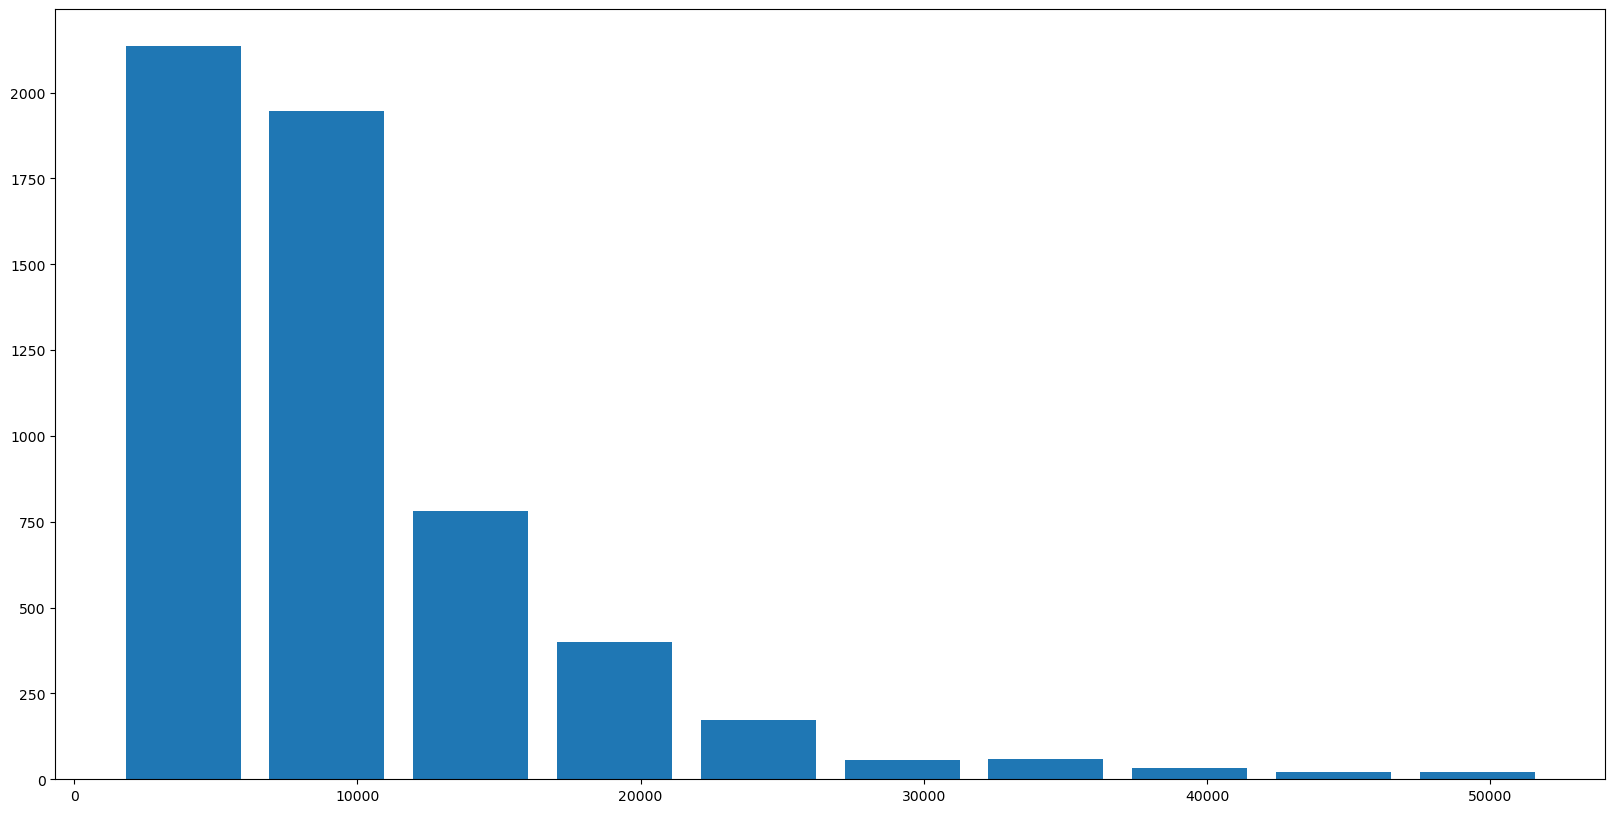

In [75]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df13.Price_per_SQFT,rwidth=0.8)

In [76]:
dummies = pd.get_dummies(df13.Location)

In [77]:
dummies.head()

,"7th Phase, JP Nagar,Bangalore","8th Phase, JP Nagar,Bangalore","Adayalampet, Maduravoyal,Chennai","Alandi, Pune","Amarabati, Sodepur,Kolkata","Ambegaon, Pune","Amrutahalli, Bangalore","Anekal, Bangalore","Anjanapura Township, Bangalore","Anna Nagar, Chengalpattu,Chennai",...,"Veer Sandra, Electronic City Phase II,Bangalore","Veer Sandra, Electronic City,Bangalore","Veppampattu, Chennai","Vetal Nagar, Hadapsar,Pune","Virar East, Mumbai","Vishwapriya Nagar, Begur,Bangalore","Wagholi, Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df13.Location.unique()

array(['7th Phase, JP Nagar,Bangalore', '8th Phase, JP Nagar,Bangalore',
       'Adayalampet, Maduravoyal,Chennai', 'Alandi, Pune',
       'Amarabati, Sodepur,Kolkata', 'Ambegaon, Pune',
       'Amrutahalli, Bangalore', 'Anekal, Bangalore',
       'Anjanapura Township, Bangalore',
       'Anna Nagar, Chengalpattu,Chennai', 'Attibele, Bangalore',
       'Avadi, Chennai', 'BEML Layout, Bagalur,Bangalore',
       'Bachupally, Hyderabad', 'Balewadi, Pune',
       'Banashankari 3rd Stage, Banashankari,Bangalore',
       'Banashankari 6th Stage 6th Block, Bangalore',
       'Bande Mutt, Kengeri Satellite Town,Bangalore', 'Baner, Pune',
       'Bannerughatta, Bangalore', 'Baramati, Pune', 'Barasat, Kolkata',
       'Bavdhan, Pune', 'Biotech Park, Chandapura,Bangalore',
       'Bisuvanahalli, Bangalore', 'Block E, Krishna Nagar,New Delhi',
       'Bommanahalli, Bangalore',
       'Bommasandra Industrial Area, Bommasandra,Bangalore',
       'Byagadadhenahalli, Bangalore', 'Chakan, Pune',
      

In [79]:
df14 = pd.concat([df13, dummies.drop('Others', axis = 'columns')],axis = 'columns')

df14.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,...,"Veer Sandra, Electronic City Phase II,Bangalore","Veer Sandra, Electronic City,Bangalore","Veppampattu, Chennai","Vetal Nagar, Hadapsar,Pune","Virar East, Mumbai","Vishwapriya Nagar, Begur,Bangalore","Wagholi, Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore"
0,₹1.91 Cr,"7th Phase, JP Nagar,Bangalore",1820,10500.0,3,3,CR,1.91,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
1,₹1.75 Cr,"7th Phase, JP Nagar,Bangalore",1800,9720.0,3,3,CR,1.75,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
2,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
3,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.7,1,Bangalore,...,0,0,0,0,0,0,0,0,0,0
4,₹78.0 L,"7th Phase, JP Nagar,Bangalore",1050,7430.0,3,2,L,78.0,100,Bangalore,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df14.drop('Price', axis = 'columns')
df14.drop('Price_Value', axis = 'columns')

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_amount,PriceMultiplier,city,Area_per_BHK,...,"Veer Sandra, Electronic City Phase II,Bangalore","Veer Sandra, Electronic City,Bangalore","Veppampattu, Chennai","Vetal Nagar, Hadapsar,Pune","Virar East, Mumbai","Vishwapriya Nagar, Begur,Bangalore","Wagholi, Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore"
0,₹1.91 Cr,"7th Phase, JP Nagar,Bangalore",1820,10500.0,3,3,1.91,1,Bangalore,606.666667,...,0,0,0,0,0,0,0,0,0,0
1,₹1.75 Cr,"7th Phase, JP Nagar,Bangalore",1800,9720.0,3,3,1.75,1,Bangalore,600.000000,...,0,0,0,0,0,0,0,0,0,0
2,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,1.7,1,Bangalore,543.333333,...,0,0,0,0,0,0,0,0,0,0
3,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,1.7,1,Bangalore,543.333333,...,0,0,0,0,0,0,0,0,0,0
4,₹78.0 L,"7th Phase, JP Nagar,Bangalore",1050,7430.0,3,2,78.0,100,Bangalore,525.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,₹68.0 L,"Yesvantpur Industrial Suburb, Yeshwanthpur,Ban...",500,13600.0,2,1,68.0,100,Bangalore,500.000000,...,0,0,0,0,0,0,0,0,0,1
10915,₹1.2 Cr,"Yesvantpur Industrial Suburb, Yeshwanthpur,Ban...",1400,8570.0,3,2,1.2,1,Bangalore,700.000000,...,0,0,0,0,0,0,0,0,0,1
10916,₹1.1 Cr,"Yesvantpur Industrial Suburb, Yeshwanthpur,Ban...",1500,7330.0,3,2,1.1,1,Bangalore,750.000000,...,0,0,0,0,0,0,0,0,0,1
10917,₹75.0 L,"Yesvantpur Industrial Suburb, Yeshwanthpur,Ban...",1135,6610.0,3,2,75.0,100,Bangalore,567.500000,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df14.Price_amount = df14.Price_amount.astype(float)
df14['Amount'] = (df14.Price_amount / df14.PriceMultiplier)

In [97]:
df14.Price_amount.unique()

array([ 1.91,  1.75,  1.7 , 78.  ,  2.8 ,  1.72, 85.  , 65.  , 39.  ,
        1.15,  2.56, 60.  , 72.  , 53.  , 98.  ,  1.25,  2.  ,  1.9 ,
       55.  , 66.  , 56.  ,  1.2 , 35.  , 24.  , 71.  , 31.  , 30.  ,
       34.  ,  1.  , 25.  , 27.  , 23.  , 62.  , 50.  , 38.  ,  2.5 ,
       40.  , 21.  , 48.  , 90.  , 70.  , 54.  , 26.  , 46.  , 80.  ,
       32.  , 45.  ,  2.1 ,  1.5 ,  1.1 , 95.  , 31.4 , 20.4 , 22.  ,
       21.15, 16.2 ,  1.37, 41.  , 26.5 , 86.  , 76.  , 52.  ,  1.3 ,
        1.6 , 47.  , 58.  , 75.  ,  1.78,  2.75,  1.45,  1.27,  6.  ,
       87.  ,  2.25,  1.05, 83.  ,  1.4 , 57.  , 36.  , 44.  , 12.  ,
       14.  , 34.5 , 43.  , 17.  , 20.  , 29.  ,  1.32,  1.47,  1.31,
        1.08, 33.  , 42.  , 38.49, 49.  , 64.  , 88.  , 18.  , 38.6 ,
       37.  ,  1.35, 29.5 , 13.  , 16.5 ,  1.85,  1.68,  2.35,  2.9 ,
        2.65,  7.  ,  5.6 , 82.  ,  1.56, 38.55,  2.3 ,  2.06, 47.85,
       74.  , 61.  , 77.  , 89.  , 63.  , 25.5 , 57.99, 16.  , 23.5 ,
       19.5 ,  1.19,

In [98]:
df14.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city,...,"Veer Sandra, Electronic City,Bangalore","Veppampattu, Chennai","Vetal Nagar, Hadapsar,Pune","Virar East, Mumbai","Vishwapriya Nagar, Begur,Bangalore","Wagholi, Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore",Amount
0,₹1.91 Cr,"7th Phase, JP Nagar,Bangalore",1820,10500.0,3,3,CR,1.91,1,Bangalore,...,0,0,0,0,0,0,0,0,0,1.91
1,₹1.75 Cr,"7th Phase, JP Nagar,Bangalore",1800,9720.0,3,3,CR,1.75,1,Bangalore,...,0,0,0,0,0,0,0,0,0,1.75
2,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.70,1,Bangalore,...,0,0,0,0,0,0,0,0,0,1.70
3,₹1.7 Cr,"7th Phase, JP Nagar,Bangalore",1630,10430.0,3,3,CR,1.70,1,Bangalore,...,0,0,0,0,0,0,0,0,0,1.70
4,₹78.0 L,"7th Phase, JP Nagar,Bangalore",1050,7430.0,3,2,L,78.00,100,Bangalore,...,0,0,0,0,0,0,0,0,0,0.78


In [99]:
df15 = df14.copy()

In [132]:
df16 = df15.drop(['Price','Price_Value', 'Price_amount', 'PriceMultiplier', 'Area_per_BHK', 'Location', 'Price_per_SQFT','city'], axis = 'columns')

In [133]:
x = df16.drop('Amount', axis = 'columns')

In [134]:
x.head()

,Total_Area,Baths,BHK,"7th Phase, JP Nagar,Bangalore","8th Phase, JP Nagar,Bangalore","Adayalampet, Maduravoyal,Chennai","Alandi, Pune","Amarabati, Sodepur,Kolkata","Ambegaon, Pune","Amrutahalli, Bangalore",...,"Veer Sandra, Electronic City Phase II,Bangalore","Veer Sandra, Electronic City,Bangalore","Veppampattu, Chennai","Vetal Nagar, Hadapsar,Pune","Virar East, Mumbai","Vishwapriya Nagar, Begur,Bangalore","Wagholi, Pune","Yelahanka, Bangalore","Yemalur, Bangalore","Yesvantpur Industrial Suburb, Yeshwanthpur,Bangalore"
0,1820,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1800,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1630,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1050,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
y = df14.Amount
y.head()

0    1.91
1    1.75
2    1.70
3    1.70
4    0.78
Name: Amount, dtype: float64

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=10)

In [147]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.5588507966425196